Importing required package and libraries :

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [90]:
## Read the data

df = pd.read_excel("stock_price.xlsx")
df.tail(8)

,Date,Open,High,Low,Close,Adj Close,Volume
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [91]:
df.info

<bound method DataFrame.info of            Date        Open        High         Low       Close   Adj Close  \
0    2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1    2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2    2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3    2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4    2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...         ...         ...         ...         ...         ...         ...   
1004 2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005 2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006 2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007 2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008 2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0 

In [92]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,2020-02-05 07:30:58.870168320,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
min,2018-02-05 00:00:00,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,2019-02-06 00:00:00,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,2020-02-06 00:00:00,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,2021-02-05 00:00:00,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,2022-02-04 00:00:00,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06


Exploratory Data Analysis :

In [93]:
## To check whether close price and adjusted close price values are same,if so dropping the adjusted close price column would make sense for model prediction

df[df['Close'] == df['Adj Close']].shape

(1009, 7)

In [94]:
df = df.drop(['Adj Close'], axis=1)

In [95]:
## Missing value Treatment

df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

- There are no missing values identified for this dataset

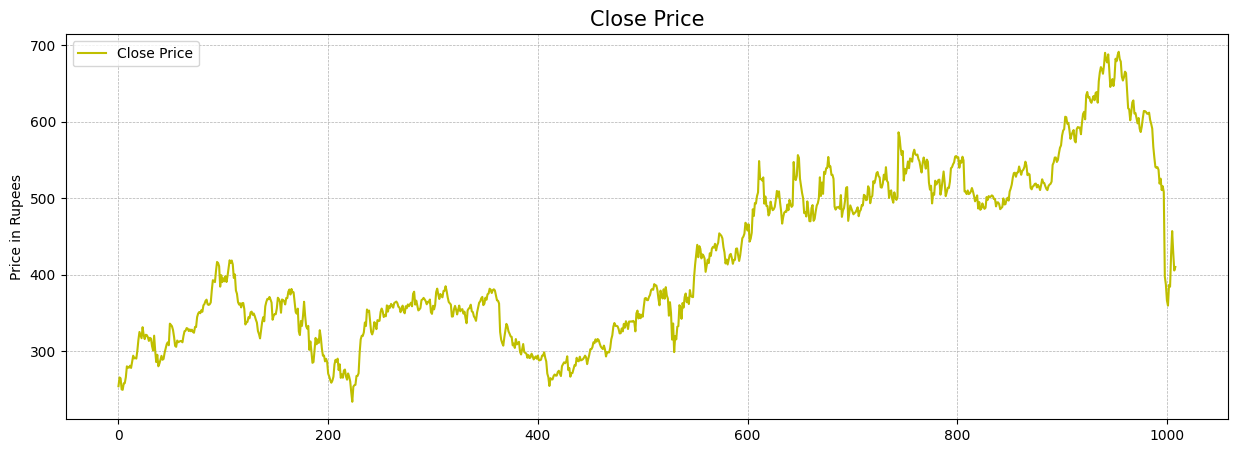

In [96]:
## Trendline to check target variable close price has any potential upside movement

plt.figure(figsize=(15, 5))

plt.plot(df['Close'], color='y', label='Close Price')
plt.title('Close Price', fontsize=15)
plt.ylabel('Price in Rupees')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

- The prices of the stock is showing an upward trend as depicted by the plot of the closing price of the stocks.

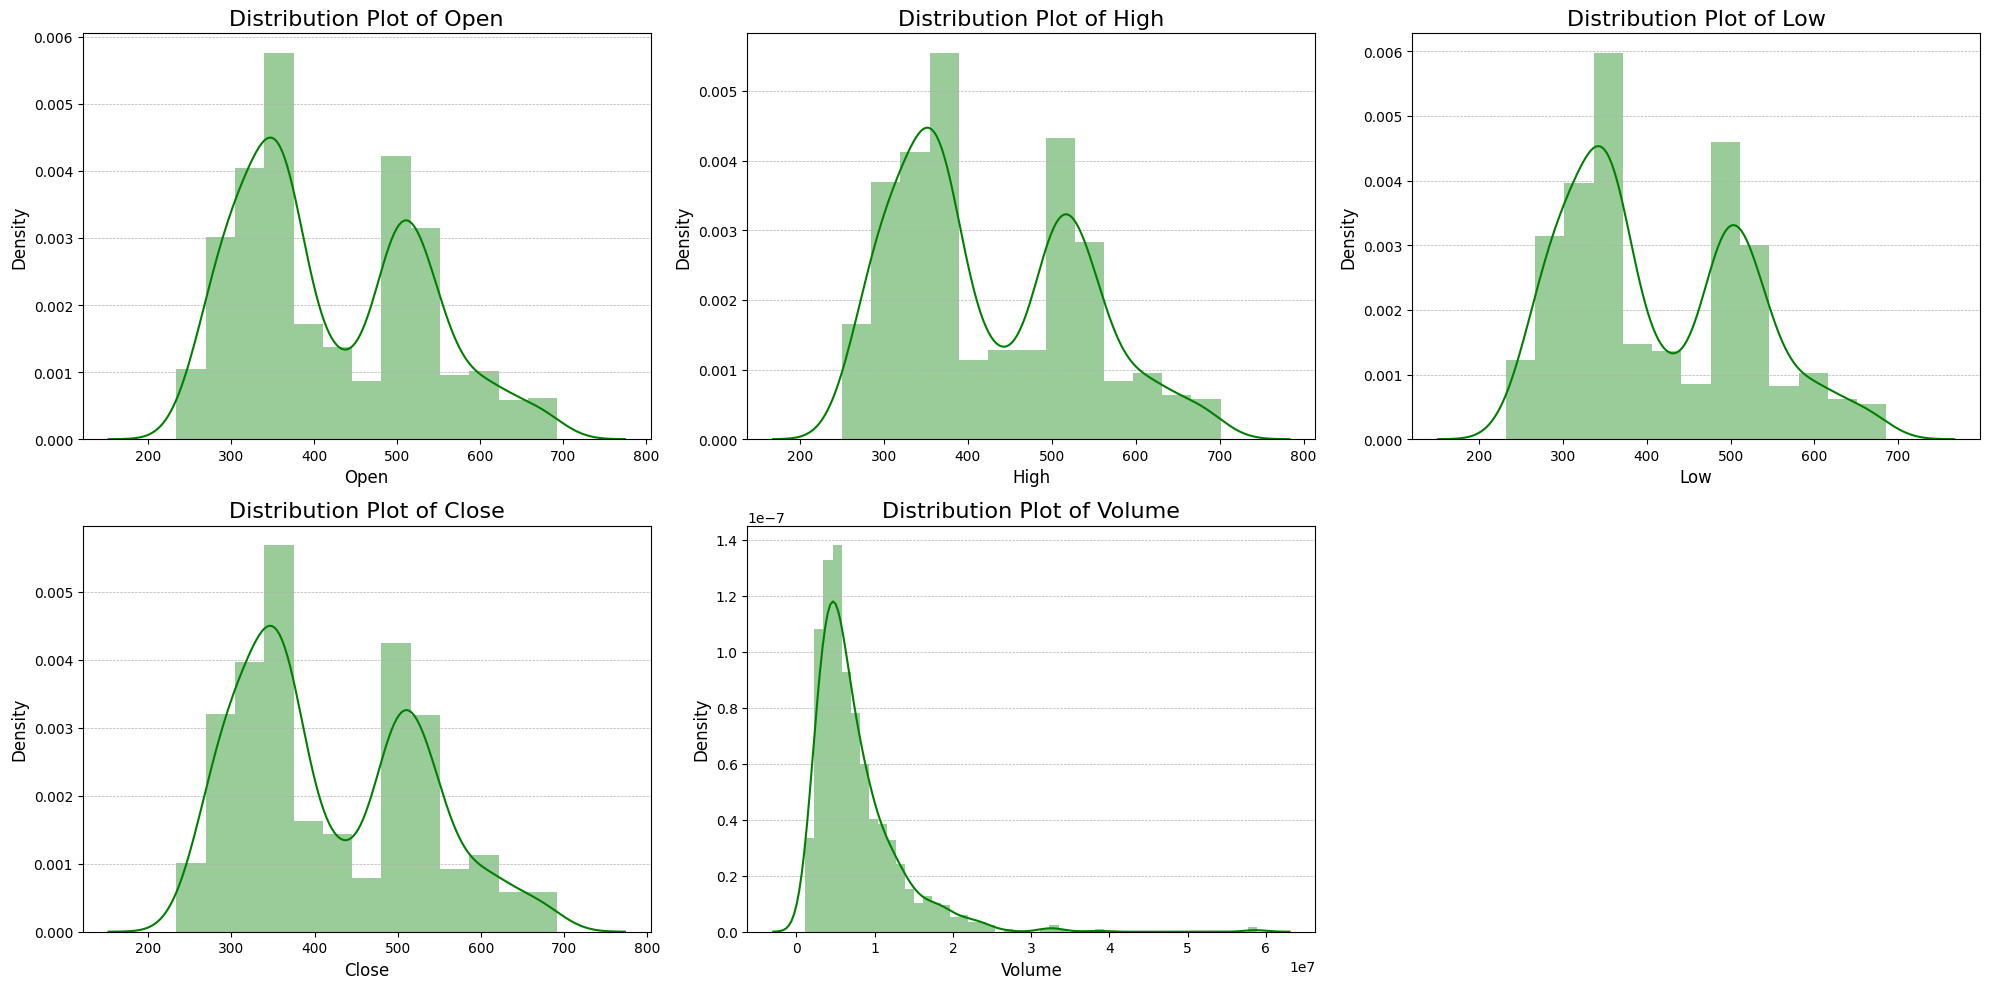

In [97]:
## Check skewness of the variables

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(df[col], color='green')
    plt.title(f'Distribution Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()

plt.show()

- In the distribution plot, we can see two peaks which means the data has varied significantly in two regions and the Volume data is left-skewed.

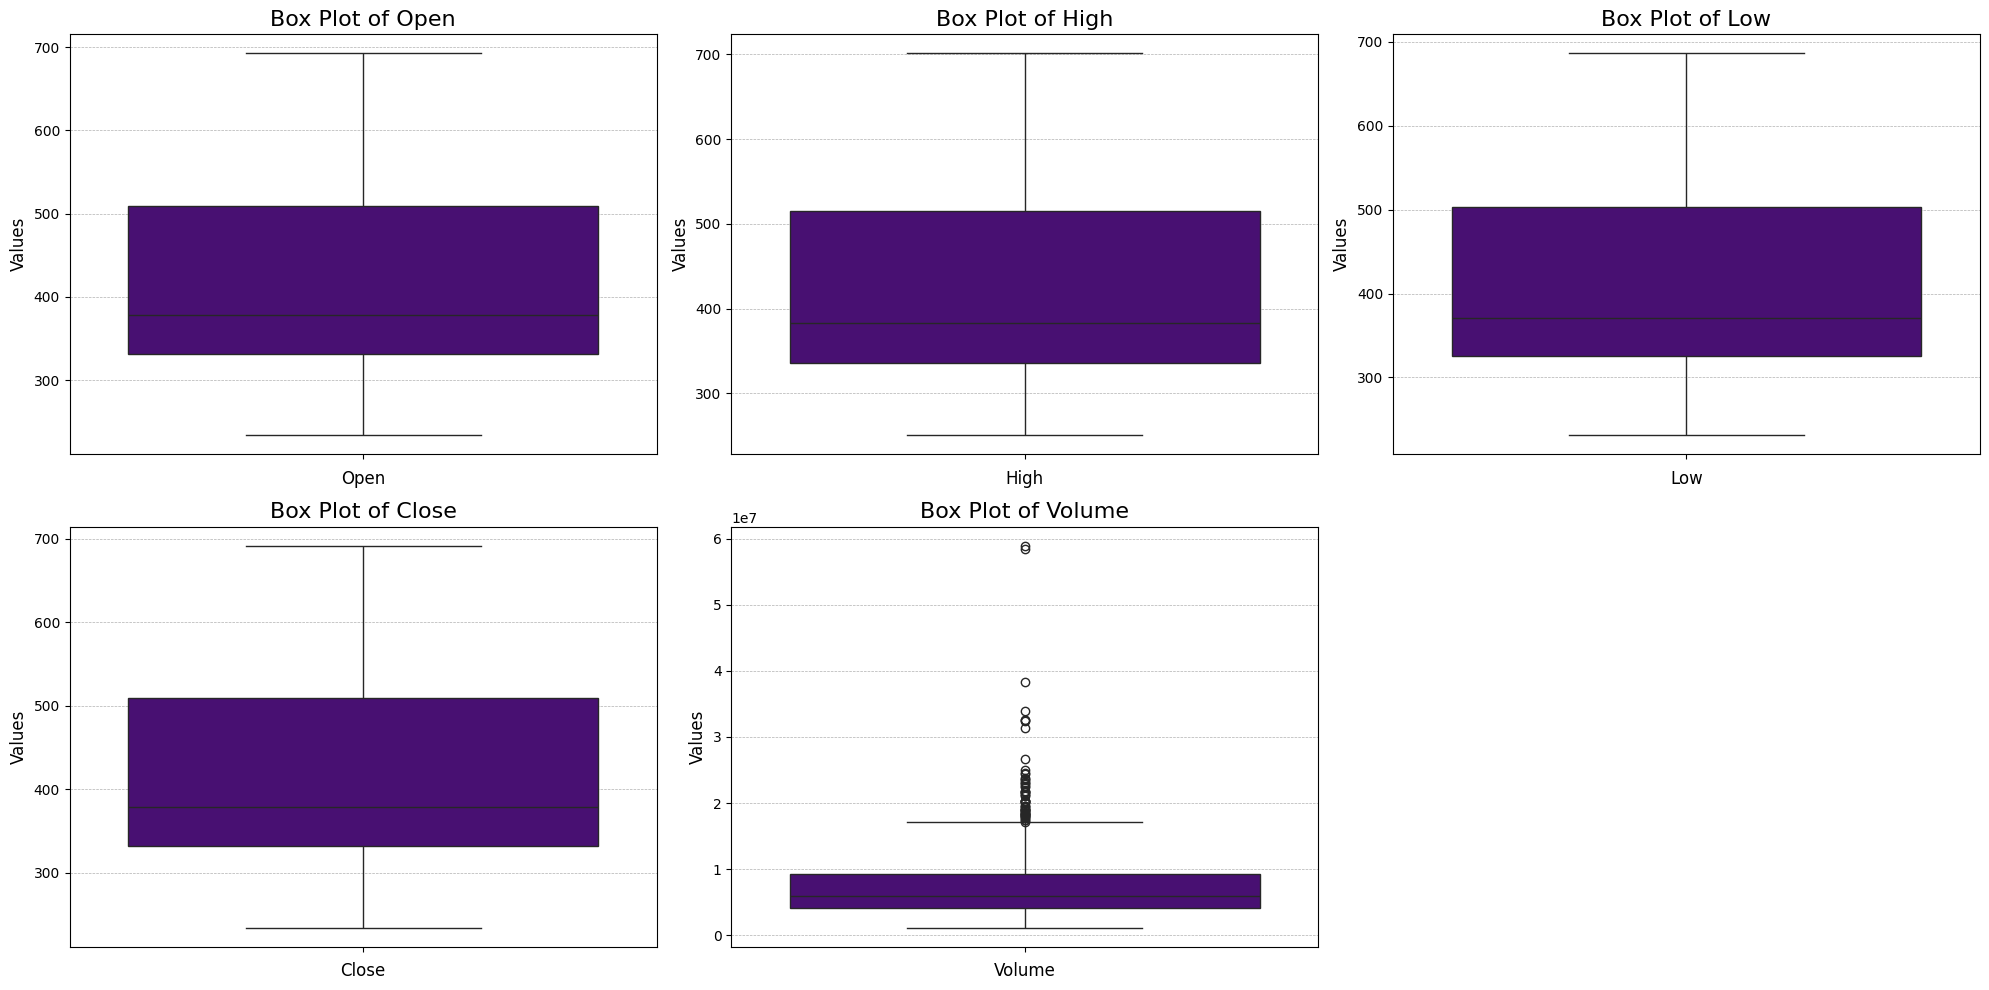

In [98]:
## Missing Value Treatment

import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(20, 10))

features = ['Open', 'High', 'Low', 'Close', 'Volume']  # Assuming these are columns in your DataFrame

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.boxplot(data=df[col], color='indigo')
    plt.title(f'Box Plot of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()

plt.show()

- From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier. So there is no need for outlier treatment as the data itself is very limited for the prediction.

Feature Engineering :

In [99]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [100]:
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9


- Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [101]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9,0


- Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

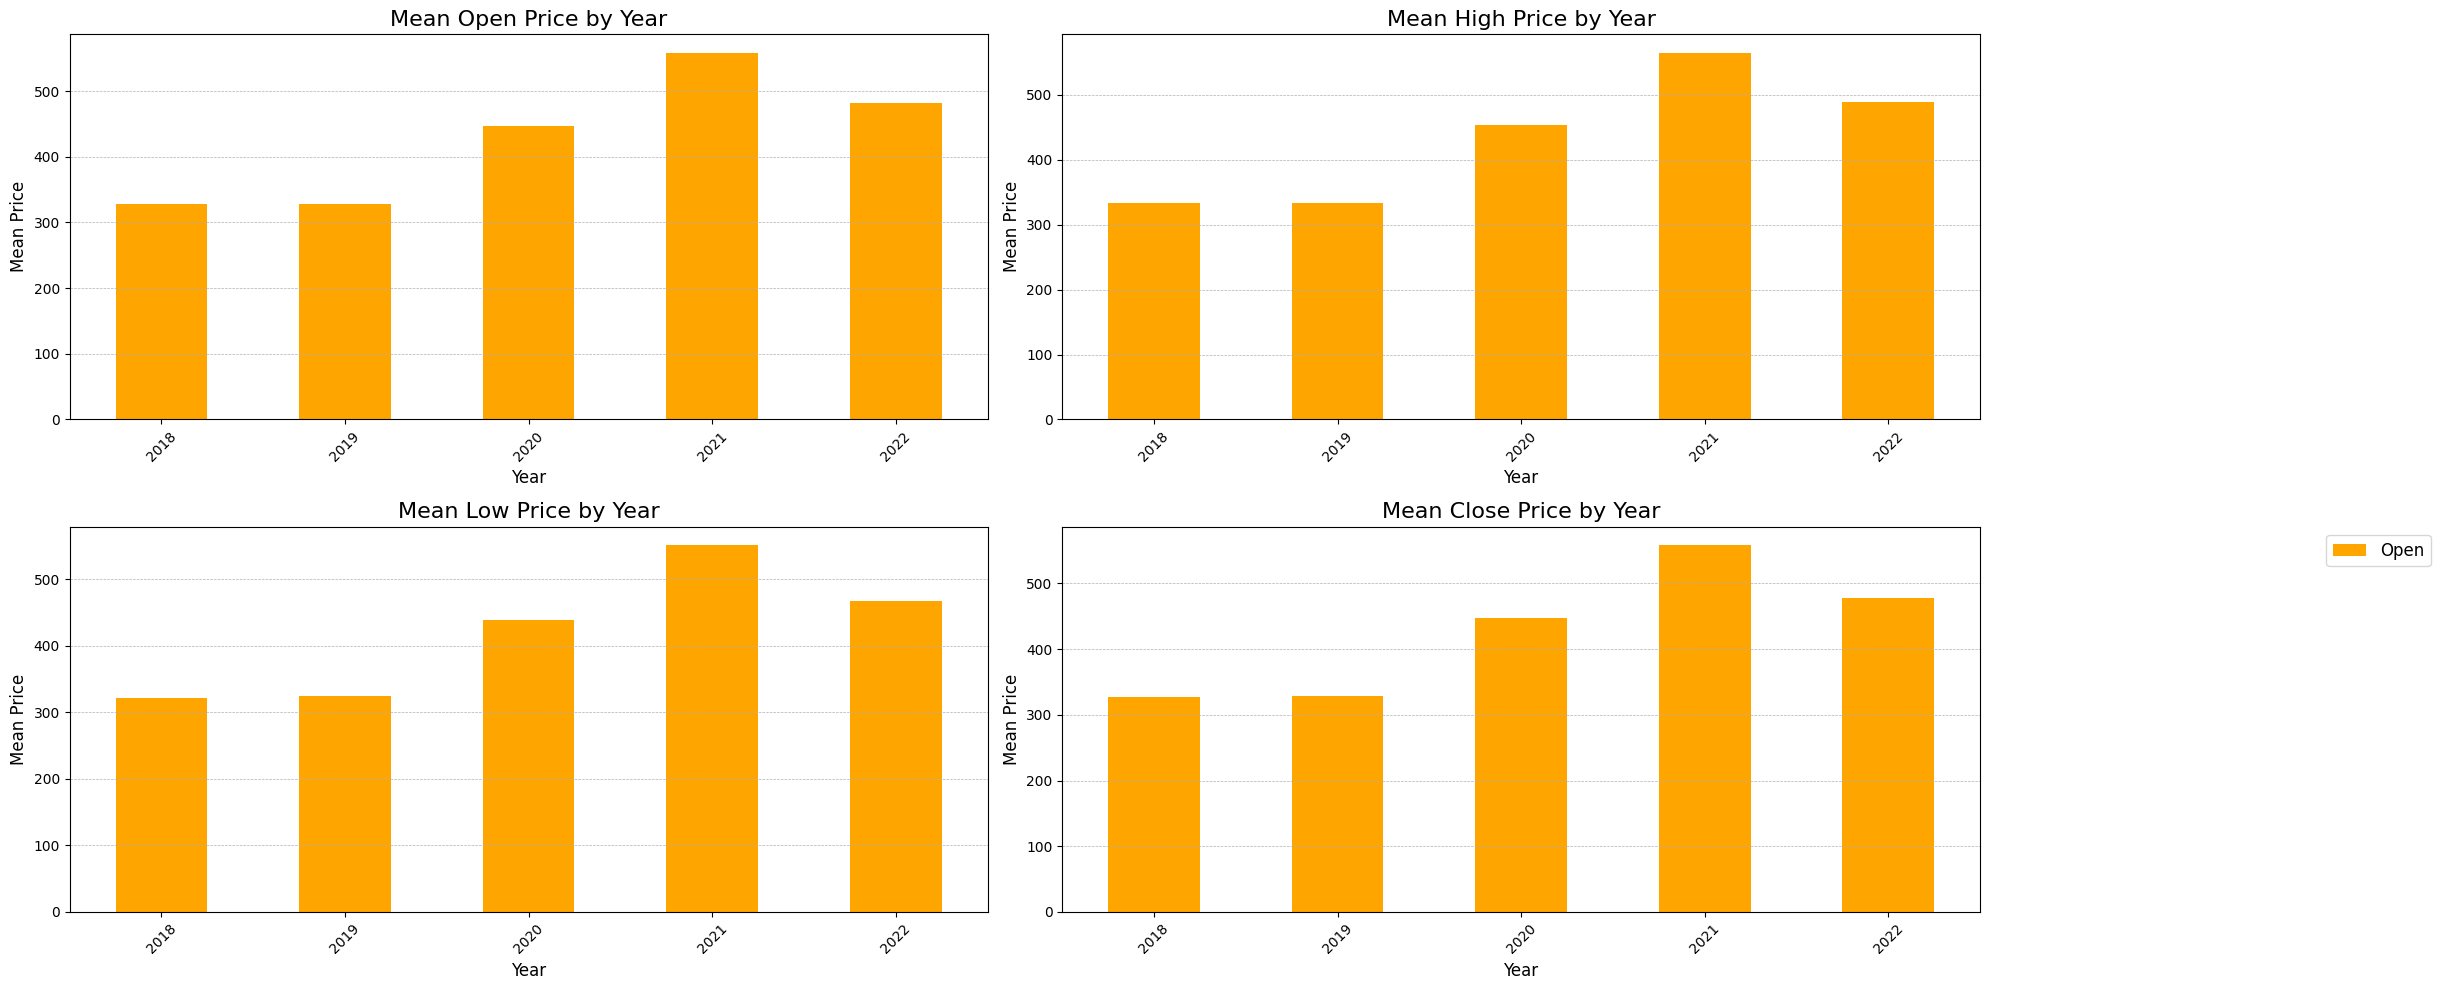

In [102]:
data_grouped = df.groupby('Year').mean()

plt.figure(figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i+1)
    data_grouped[col].plot.bar(color='orange')
    plt.title(f'Mean {col} Price by Year', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Mean Price', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()

plt.legend(['Open', 'High', 'Low', 'Close'], loc='upper right', bbox_to_anchor=(1.5, 1), fontsize=12)
plt.show()

- From the above bar graph, we can conclude that the stock prices have doubled from the year 2021 to that in 2022.

In [103]:
df.groupby('is_quarter_end').mean()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
is_quarter_end,,,,,,,,,
0,2020-02-01 05:55:42.857142784,418.681368,424.889821,412.112068,418.699791,7.951664e+06,2019.622024,6.087798,15.715774
1,2020-02-13 10:06:45.934718208,419.814037,426.179910,412.896440,419.600831,6.810988e+06,2019.543027,7.442136,15.721068


- Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
- The volume of trades is lower in the months which are quarter end.

In [104]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,is_quarter_end,open-close,low-high,target
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5,0,7.740005,-17.869995,1
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6,0,-18.020004,-21.700012,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7,0,2.019989,-8.120025,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8,0,16.979981,-17.619995,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9,0,4.380005,-19.690002,1


- We have added the target feature which is a signal whether to buy or not we will train our model to predict this only

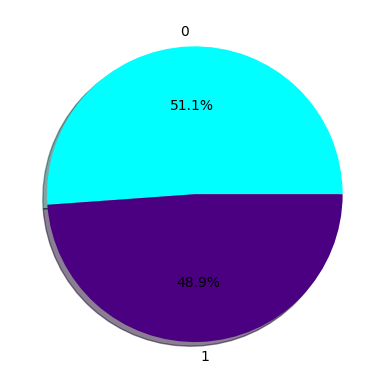

In [105]:
## Check balance between target and input variable

colors = ("cyan","indigo")
plt.pie(df['target'].value_counts().values, labels=[0, 1],colors=colors, shadow=True,autopct='%1.1f%%')
plt.show()

- When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

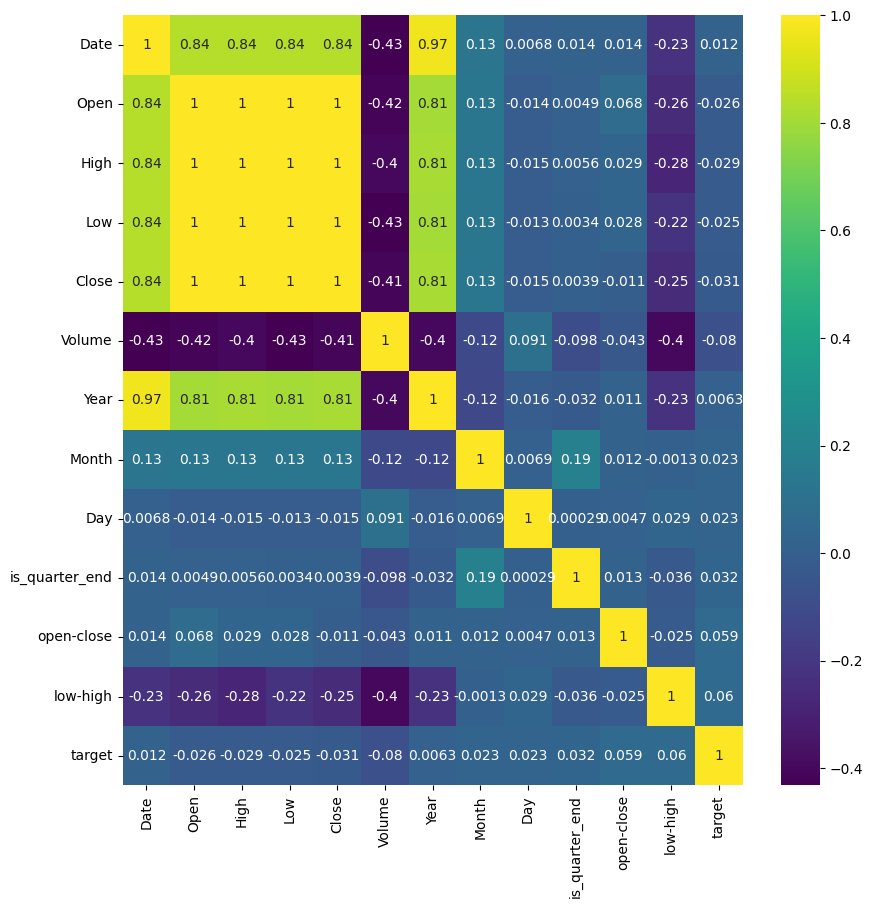

In [106]:
## Check Correalation between dependent and independent variables

plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(), annot=True,cmap='viridis',cbar=True)
plt.show()

- From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

Data Splitting & Normalization :

In [107]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(908, 3) (101, 3)


- After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

Model Evaluation :

In [31]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5405992563971713
Validation Accuracy :  0.582598235765838

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.532652912444412
Validation Accuracy :  0.4947874899759423

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Ac

- Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.